# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.1. Download Dataset

If you want to know how data has been saved in pickle file: see this [ipynb file](https://drive.google.com/file/d/1ZQUVBzgH7N2EbiyE3WTPx7JNe2eRTs36/view?usp=sharing)

In [ ]:
#install library in cloab
!pip install contractions

     |████████████████████████████████| 286kB 2.9MB/s 
     |████████████████████████████████| 327kB 15.8MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85395 sha256=9bf6936cad7fb15c2340f4492e3f47ce7f8e100e1e0766b2b1153a1ed32fb559
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
#import libraries
import re
import string 

import numpy as np
import pandas as pd 
#For plots
import matplotlib.pyplot as plt
import seaborn as sns
#For Evaluation metrics
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.preprocessing import LabelEncoder

#For checking ,removing html tags
from bs4 import BeautifulSoup
# For parsing our XML data
from lxml import etree 
#For Word vectors
from gensim.models import FastText

#For nlp
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.casual import TweetTokenizer
from nltk.stem import WordNetLemmatizer


#contractions
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1lTD6bgRkmwguGAr30v-r0KBPdtnVneLb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.pkl')  

id = '1pCUdlZMoj99UZHtqFeza86fvVQfFmDFX'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.pkl')  

# import pickle
# training_data = pickle.load(open("training_data.pkl","rb"))
# testing_data = pickle.load(open("testing_data.pkl","rb"))

# #import TED scripts from Google Drive
# id = '1B47OiEiG2Lo1jUY6hy_zMmHBxfKQuJ8-'
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('ted_en-20160408.xml')  


#import the lexcion data set 
downloaded = drive.CreateFile({'id':"1kUZ-gg7tXbFbMVqsGHVt479M47Ur3tkF"})   # replace the id with id of file you want to access
downloaded.GetContentFile('positive-words.txt')  

downloaded = drive.CreateFile({'id':"1qAjh2hSgH_dbauQRr-8NrJPviOZpNSqn"})   # replace the id with id of file you want to access
downloaded.GetContentFile('negative-words.txt') 

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data[0][0], training_data[0][1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 8000
Size of testing dataset: 2000
------------------------------------
------------------------------------
Sample Data
LABEL: neg / SENTENCE: hopeless for tmr :(
------------------------------------


## 1.2. Preprocess data

Data Preprocessinf techniques used:


*   Using [Pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to check for any missing or NAN values
*   Each word to Lower case
*   Removal of numbers, urls and emails
*   Contraction (eg: I'l -> I will)
*   Removal of stopwords (most common words)
*   nltk: TweetTokenizer (convert to word tokens)
*   Remove punctuations

The aim to is to perform sentiment analysis.Hence it is important to preserve emoticons and emojis, this can be achieved by using TweetTokenizer from [nltk.tokenize](https://www.nltk.org/api/nltk.tokenize.html).(eg: if a sentence is "I love eating momo :)", with TweetTokenizer we get ['I','love',eating','momo',':)']).

The data is checked for any null or missing values. The punctutation,email,numbers and urls are noise in the data for sentiment analysis, they are removed. There are contractions in data which are expanded using [contractions library](https://pypi.org/project/contractions/). Stopwords are most common words in data (eg: I, we,is,do,etc) which might not add value to the document,hence removed.

In [ ]:
#function to remove stopwords
def remove_stopwords(x):
  return " ".join([w for w in str(x).split() if w not in stop_words])

#function to remove numbers
def remove_nos(x):
  return re.sub('[0-9]+','',x)

#functions to remove urls
def remove_urls(x):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', x)

#function to  remove emails
def clean_email(x):
  return re.sub('@[^\s]+|\#','',x)

#function to expand contractions
def contract(x):
  return contractions.fix(x)

#function to remove punctutations
def remove_punc(x):
  if x not in string.punctuation:
    return x

(8000, 2)
     0                                                  1
0  neg                                hopeless for tmr :(
1  neg  Everything in the kids section of IKEA is so c...
2  neg  @Hegelbon That heart sliding into the waste ba...
3  neg  “@ketchBurning: I hate Japanese call him "bani...
4  neg           Dang starting next week I have "work" :(
5  neg  oh god, my babies' faces :( https://t.co/9fcwG...
6  neg                  @RileyMcDonough make me smile :((
7  neg  @f0ggstar @stuartthull work neighbour on motor...
8  neg  why?:("@tahuodyy: sialan:( https://t.co/Hv1i0x...
9  neg  Athabasca glacier was there in #1948 :-( #atha...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8000 non-null   object
 1   1       8000 non-null   object
dtypes: object(2)
memory usage: 125.1+ KB

Null values: 0

Any NAN values: False


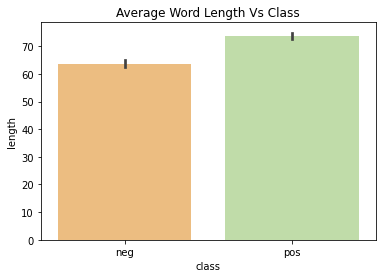

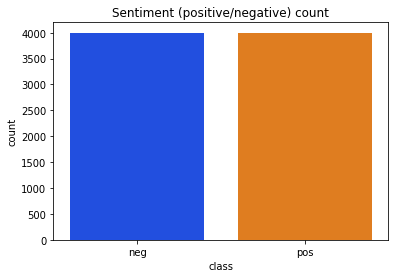

In [ ]:
# Please comment your code
#load pandas library to view data and process data
df_train=pd.DataFrame(training_data)
df_test=pd.DataFrame(testing_data)
print(df_train.shape)
print(df_train.head(10))

df_train.info()
#check for any missing/null values
print(f"\nNull values: {df_train.isnull().values.sum()}")
#chekc for any NAN values
print(f"\nAny NAN values: {df_train.isnull().values.any()}")

#distribution of sentiment by word length and sentiment type
df_train.columns=['class','tweet']
df_test.columns=['class','tweet']
df_train['length']=df_train['tweet'].apply(len)
sns.barplot(x='class',y='length',data=df_train,palette='Spectral')
plt.title('Average Word Length Vs Class')
plt.show()
sns.countplot(x='class',data = df_train,palette='bright')
plt.title('Sentiment (positive/negative) count')
plt.show()

In [ ]:
#test_data 
df_test.head(10)

,class,tweet
0,neg,@AndreaMarySmith very helpful .... Or will be ...
1,neg,@realyys_ OTL NEVERMIND :( at least i got jeon so
2,neg,And AS SOON as I tweeted that she planted her ...
3,neg,@luketothestars damnit :(
4,neg,@KLM I used to be PRY/PV ..... wish I could re...
5,neg,It's really hot :-(
6,neg,@Carouselballet Monday? :(
7,neg,@badoeuf If going to stop breakfast early you ...
8,neg,@blairforce2 which means its on its way over h...
9,neg,:( but wtf am I supposed to do now without her


In [ ]:
print(f"Before preprocessing:\n {df_train.head(10)}")
#stopwords removal for training and test data
stop_words=sw.words()
df_train['tweet']=df_train['tweet'].apply(lambda x:remove_stopwords(x))
df_test['tweet']=df_train['tweet'].apply(lambda x:remove_stopwords(x))


#cleaning numbers for training and test data
df_train['tweet']=df_train['tweet'].apply(lambda x: remove_nos(x))
df_test['tweet']=df_train['tweet'].apply(lambda x:remove_nos(x))

#removing urls for training and test data
df_train['tweet'] = df_train['tweet'].apply(remove_urls)
df_test['tweet']=df_train['tweet'].apply(lambda x:remove_urls(x))

#cleaning emails for training and test data
df_train['tweet'] = df_train['tweet'].apply(clean_email)
df_test['tweet']=df_train['tweet'].apply(lambda x:clean_email(x))
print(f"\nAfter some preprocessing:\n ")
df_train.head(10)

Before preprocessing:
   class                                              tweet  length
0   neg                                hopeless for tmr :(      19
1   neg  Everything in the kids section of IKEA is so c...      85
2   neg  @Hegelbon That heart sliding into the waste ba...      54
3   neg  “@ketchBurning: I hate Japanese call him "bani...      62
4   neg           Dang starting next week I have "work" :(      40
5   neg  oh god, my babies' faces :( https://t.co/9fcwG...      51
6   neg                  @RileyMcDonough make me smile :((      33
7   neg  @f0ggstar @stuartthull work neighbour on motor...     124
8   neg  why?:("@tahuodyy: sialan:( https://t.co/Hv1i0x...      51
9   neg  Athabasca glacier was there in #1948 :-( #atha...     139

After some preprocessing:
 


,class,tweet,length
0,neg,hopeless tmr :(,19
1,neg,Everything kids section IKEA cute. Shame I'm n...,85
2,neg,That heart sliding waste basket. :(,54
3,neg,"“ I hate Japanese call ""bani"" :( :(” Me",62
4,neg,"Dang starting next week I ""work"" :(",40
5,neg,"oh god, babies' faces :(",51
6,neg,make smile :((,33
7,neg,work neighbour motors. Asked said hates upda...,124
8,neg,"why?:("" sialan:(",51
9,neg,Athabasca glacier :-( athabasca glacier jaspe...,139


In [ ]:
#expnading contractions for training and test data
df_train['tweet']=df_train['tweet'].apply(contract)
df_train.head(10)
df_test['tweet']=df_test['tweet'].apply(contract)

In [ ]:
#Convert to Lower Case for training and test data
df_train['tweet']=df_train['tweet'].str.lower()
df_train.head(10)
df_test['tweet']=df_test['tweet'].str.lower()

In [ ]:
#cleaning symbols that would not be removed by string.punctuation
#function to clean symbols
def clean_str(string):
    string = re.sub(r'(\.)+|(\-)+>|\(\|\)|<(\.)+|\s|<(\-)+|(\_)+|“|”|⅛|⅞|\"|…|£|«|–|—|•|←|→|∗', " ", string)
    string =str.strip(string)
    
    return string

#apply function to remove symbols for training and test data
df_train['tweet']=df_train['tweet'].apply(clean_str)
df_train.head(10)
df_test['tweet']=df_test['tweet'].apply(clean_str)

In [ ]:
#Tweet tokenizer preserving emoticons
tt=TweetTokenizer(strip_handles=True)

#apply to both set
df_train['tweet']=df_train['tweet'].apply(tt.tokenize)
df_train['tweet'].head(10)
df_test['tweet']=df_test['tweet'].apply(tt.tokenize)

In [ ]:
#remove punctuation after tweet tokenizer 
#it wont remove the emoticons now
#function to remove punctuations
def remove_punc_df(x):
  v=[]
  for w in x:
    if w not in string.punctuation:
      v.append(w)
  return v

#call function to remove punctuations for training and test set
df_train['tweet']=df_train['tweet'].apply(remove_punc_df)
df_train['tweet'].head(10)
df_test['tweet']=df_test['tweet'].apply(remove_punc_df)

In [ ]:
#double chekcing if there are any null values introduced by preprocessing
print(f"\nAny NAN values: {df_train['tweet'].isnull().values.any()}")
print(f"\nAny NAN values: {df_test['tweet'].isnull().values.any()}")


Any NAN values: False

Any NAN values: False


In [ ]:
# #converting pandas dataframe tweet column to  a list
# sentences=df_train['tweet'].to_list()
# sentences[1:5]

# #Tokenize the tweet sentences 
# tokens=[]
# tt=TweetTokenizer(strip_handles=True)
# for sent in sentences:
#   for word in tt.tokenize(sent):
#     tokens.append(word)

In [ ]:
# cleaned_tokens=[]
# for token in tokens:
#   cleaned_tokens.append(remove_punc(token))

In [ ]:
# cleaned_tokens[1:30]
# #removing none type
# cleaned_tokens=[token for token in cleaned_tokens if token is not None]

In [ ]:
# no_chars=[]
# for tokens in cleaned_tokens:
#   if not tokens.isalpha():
#      no_chars.append(re.sub(r"(\.)+|(\-)+>|\(\|\)|<(\.)+|\s|<(\-)+|(\_)+|“|”|⅛|⅞",'',tokens))
# import numpy as np
# y=np.unique(no_chars)
# print(len(y))
# y

In [ ]:
#tokenize preserving emoticons
# tt=TweetTokenizer(strip_handles=True)

# df_train['tweet']=df_train['tweet'].apply(tt.tokenize)

# df_train.head(5)
# no_chars=[]
# for tokens in cleaned_tokens:
#   if not tokens.isalpha():
#      no_chars.append(re.sub(r"(\.)+|(\-)+>|\(\|\)|<(\.)+|\s|<(\-)+|(\_)+|“|”|⅛|⅞",'',tokens))
# import numpy as np
# y=np.unique(no_chars)
# len(y)
# y
# emoj_cons=['(-:', '(:', '):', ":'(", ":')", ':(', ':)', ':-(', ':-)',
#       #  ':-d', ':/', '::', ':\\', ':d', ':p', ':|', ';(', ';)', ';-)',
#        ';p', ';}', '=:', '=d', '>:(', '>:)', '>:-(', '>:d', '🌃', '🌎', '🌚', '🌞', '🌷', '🌸', '🍅', '🍜', '🍤', '🍭', '🍰', '🍵', '🍸',
#        '🍹', '🎀', '🎂', '🎈', '🎉', '🎵','🐑', '🐒', '🐢', '👆', '👈',
#        '👉', '👊', '👌', '👍', '👏', '👑', '👓', '👯', '💃', '💅', '💋', '💓', '💔',
#        '💕', '💖', '💗', '💘', '💙', '💚', '💛', '💜', '💞', '💟', '💥', '💦', '💪',
#        '💫', '🔥', '🗽', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😉', '😊', '😌',
#        '😍', '😒', '😓', '😔', '😕', '😘', '😚', '😜', '😞', '😟', '😢', '😤', '😧',
#        '😩', '😪', '😬', '😭', '😴', '😵', '🙅', '🙈', '🙏', '🚂', '🚖', '🚙',
#        '\U000fe196', '\U000fe334','☔', '☕', '☺', '☼', '♛', '♡', '♥', '♫', '♬', '⚡', '✈', '✌', '✔','✧', '✨', '❤', '⭐','∠']

In [ ]:
# #let's try to test with porter algorithm
# #dont use it 
# from nltk.stem.porter import *
# stemmer = PorterStemmer()

# stem_tokens = [stemmer.stem(token) for token in cleaned_tokens]

# print(stem_tokens[1:30])

In [ ]:


# lem_tokens=[lemmatizer.lemmatize(token) for token in cleaned_tokens]
# print(lem_tokens[0:30])

In [ ]:
# call function to lemmatize words using WordNetLemmatizer from nltk package
lemmatizer = WordNetLemmatizer()
def lemma(x):
  v=[]
  for w in x:
    v.append(lemmatizer.lemmatize(w))
  return v

#apply to both train and test set
df_train['tweets']=df_train['tweet'].apply(lemma)
df_train['tweets'].head(10)
df_test['tweets']=df_train['tweet'].apply(lemma)

In [ ]:
# converting the lemmatize column of pandas dataframe to list
sentences=df_train['tweet'].to_list()
labels=df_train['class'].to_list()

test_sentences=df_test['tweet'].to_list()
labels_test=df_test['class'].to_list()

# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *

We are training the FastText model using pretrained data. Our data size is small and training own wordvector will not catch fully context,sentiment,syntatic and symentic relationship.FastText uses n-gram approach and works well for Out of Vocabulary words as well.

In [ ]:
#Refer to Lab 5 code 
# Set is a hashtable in python
word_set = set() 
for sent in sentences:
    for word in sent:
        word_set.add(word)
# Sometimes you can use same token to present PAD and UNKOWN if you just want to set them as all zeros
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

#creating word list, that will remove duplicates
word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

['(-:', '(:', '):', '--->', '-->', '->', ":'(", ":')", ':(', ':)', ':-(', ':-)', ':-d', ':/', '::', ':\\', ':d', ':p', ':|', ';(', ';)', ';-)', ';p', ';}', '<---', '=:', '=d', '>:(', '>:)', '>:-(', '>:d', '[PAD]', '[UNKNOWN]', 'a', 'aa', 'aaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaah', 'aaaaaand', 'aaaaages', 'aaaaahhhhhhhh', 'aaaahh', 'aaaahhh', 'aaahhh', 'aah', 'aahhhh', 'aaj', 'aameen', 'aapke', 'aaron', 'aarww', 'aayegi', 'ab', 'abandoned', 'abandoning', 'abby', 'abbymill', 'abes', 'abhi', 'abi', 'abit', 'able', 'abligaverins', 'aboard', 'about', 'abouty', 'abroad', 'abrupt', 'abs', 'abscess', 'absent', 'absolute', 'absolutely', 'abstinence', 'abt', 'abu', 'abusive', 'abuti', 'ac', 'academics', 'acads', 'acc', 'accent', 'accept', 'accepted', 'access', 'accessories', 'accident', 'accidentally', 'accnt', 'accommodate', 'according', 'account', 'accounts', 'accs', 'accumulated', 'accurate', 'ace', 'acha', 'ache', 'achebe', 'achi', 'achieved', 'achieving', 'acid', 'ack', 'acne', 'acorn'

In [ ]:
#Refer to Lab 5 code 
# Convert the sentences to the word index
len_list = [len(s) for s in sentences]
seq_length = max(len_list)
# print(seq_length)

def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
test_encoded =encode_and_add_padding(test_sentences,seq_length, word_index )
# print(sent_encoded)

51


In [ ]:
#Refer to Lab 5 code 
#converting target labels to encoded using LabelEncoder
lEnc = LabelEncoder()
lEnc.fit(labels)
label_encoded= lEnc.transform(labels)
#converting test labels too
label_test_encoded=lEnc.fit_transform(labels_test)
#print encoded train label
print(label_encoded)

[0 0 0 ... 1 1 1]


### 2.1.1. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*

Teh given data was cleaned from sound effects labels using regular expression as these wont be removed by normal punctuation removal process.The punctuation were removed using python re library abd regular expression. Tokenized function form NLTK was used to tokenized the words.



In [ ]:
# Please comment your code
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')

# Getting contents of <content> tag from the xml file
target_text = etree.parse(targetXML)
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# Removing "Sound-effect labels" using regular expression (regex) (i.e. (Audio), (Laughter))
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# Tokenising the sentence to process it by using NLTK library
sent_text=sent_tokenize(content_text)

# Removing punctuation and changing all characters to lower case
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# Tokenising each sentence to process individual word
sentences=[]
sentences=[word_tokenize(sentence) for sentence in normalized_text]

# Prints only 10 (tokenised) sentences
print(sentences[:10])

[['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new'], ['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation'], ['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing'], ['consider', 'facit'], ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'], ['facit', 'was', 'a', 'fantastic', 'company'], ['they', 'were', 'born', 'deep', 'in', 'the', 'swedish', 'forest', 'and', 'they', 'made', 'the', 'best', 'mechanical', 'calculators', 'in', 'the', 'world'], ['everybody', 'used', 'them'], ['and', 'what', 'did', 'facit', 'do', 'when', 'the', 'electronic', 'calculator', 'came', 'along'], ['they', 'continued', 'doing', 'exactly', 'the', 'same']]


### 2.1.2. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*


* Size is the dimenisonality of word vectors.
* Windows is the maximum distance between the current and predicted word within a sentence
*   min_count: ignores all the words with total frequency lower than this
*   sg=1: specifies skip gram architecture where using center work contex words are determined.
*   workers: thread to train the model

This hyperparameters were choosen from lab 2 examples.









In [ ]:
#Fasttext skip gram model 
ft_sg_model = FastText(sentences, size=100, window=5, min_count=5, workers=2, sg=1)

In [ ]:
import pprint
# As we can see, FastText allows us to obtain word vectors for out-of-vocabulary words
result=ft_sg_model.wv.most_similar("electrofishing")
pprint.pprint(result)

[('electrolux', 0.7994120121002197),
 ('electro', 0.7860185503959656),
 ('electrolyte', 0.7810736298561096),
 ('electric', 0.7671724557876587),
 ('electroshock', 0.7657183408737183),
 ('electrochemical', 0.7631435990333557),
 ('electrons', 0.759713888168335),
 ('airbus', 0.7582193613052368),
 ('electroencephalogram', 0.7510684728622437),
 ('electrogram', 0.7489620447158813)]


In [ ]:
ft_sg_model.wv.save_word2vec_format('ted_word-vectors.txt', binary=False)

### 2.1.3. Train Word Embeddings Model

In [ ]:
# word_emb_model = api.load("glove-twitter-25")
emb_dim = ft_sg_model.vector_size

In [ ]:
emb_table = []
for i, word in enumerate(word_list):
    if word in ft_sg_model:
        emb_table.append(ft_sg_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [ ]:
len(emb_table)==len(word_list)


True

## 2.2. Lexicon Embeddings

### 2.2.1. Lexicon-based Embedding

*[Optional] You are required to describe why you would like to use more than one-dimensional embedding.*

In [ ]:
df_pos_words = pd.read_csv('positive-words.txt',delimiter = "\t",header=None)
df_neg_words = pd.read_csv('negative-words.txt',delimiter = "\t",encoding='ISO-8859-1',header=None)

In [ ]:
df_pos_words.columns=['positives']
df_neg_words.columns=['negatives']
pos_words=df_pos_words['positives'].to_list()
neg_words=df_neg_words['negatives'].to_list()

In [ ]:
#create vector based on psotivie and negative words for our wordlist token
lex_vector=[]
for word in word_list:
  if word in pos_words:
    lex_vector.append(2)
  elif word in neg_words:
    lex_vector.append(1)
  else:
    lex_vector.append(0)


In [ ]:
lex_vector=np.array([lex_vector])
lex_vector

array([[0, 0, 0, ..., 0, 0, 0]])

## 2.3. Bi-directional RNN Sequence model

### 2.3.1. Apply/Import Word Embedding and Lexicon Embedding

In [ ]:
# Please comment your code
lex_word_emb=np.concatenate((emb_table,lex_vector.T),axis=1)
print(type(lex_word_emb))
emb_dim=lex_word_emb.shape[1]

<class 'numpy.ndarray'>


### 2.3.2. Build Sequence Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # Initialize the Embedding layer with the lookup table we created 
        self.emb.weight.data.copy_(torch.from_numpy(lex_word_emb))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)        
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n,c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z


### 2.3.3. Train Sequence Model

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
#splitting data inot train and validation set
train_data, val_data = np.split(sent_encoded, [int(.75 * len(sent_encoded))])
train_label,val_label = np.split(label_encoded, [int(.75 * len(label_encoded))])                               


# Preparing input
input_torch = torch.from_numpy(np.array(train_data)).to(device)
targe_torch = torch.from_numpy(np.array(train_label)).view(-1).to(device)

val_toch= torch.from_numpy(np.array(val_data)).to(device)
val_target_torch = torch.from_numpy(np.array(val_label)).view(-1).to(device)



In [ ]:
#parameters
vocab_size = len(word_list)
unique_labels = np.unique(labels)
n_class = len(unique_labels)
n_hidden = 32
learning_rate = [0.1,0.01,0.001]
total_epoch = [10,50,100,200]

In [ ]:
import time
t00=time.time()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()

for lr in learning_rate:
  # Move the model to GPU
  model = Bi_LSTM_Emb().to(device)
  optimizer = optim.Adam(model.parameters(), lr=lr)

  # Please comment your code
  for epochs in total_epoch:
    print(f"\nTunning For Epoch: {epochs} and learnig_rate: {lr}")
    for epoch in range(epochs):
      # Set the flag to training
      model.train()

      # forward + backward + optimize
      optimizer.zero_grad()
      outputs = model(input_torch) 
      loss = criterion(outputs, targe_torch)
      loss.backward()
      optimizer.step()

      predicted = torch.argmax(outputs, -1)
      val_outputs = model(val_toch)
      val_predicted = torch.argmax(val_outputs, -1)   
      acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())
      val_acc=accuracy_score(val_predicted.cpu().numpy(),val_target_torch.cpu().numpy())
      if epochs==10:
        print(f'Epoch: {epoch+1}, loss: {loss.item()}, train_acc:{acc}, validation_acc: {val_acc}')
      elif epoch % 10 == 0:
        print(f'Epoch: {epoch+1}, loss: {loss.item()}, train_acc:{acc}, validation_acc: {val_acc}')

    print(f'Finished Training for epoch :{epochs}')
    print(f'*****************************************\n\n')

#Run time computation
t01=time.time()

print("Total run time :", t01-t00)


Tunning For Epoch: 10 and learnig_rate: 0.1
Epoch: 1, loss: 0.6898900270462036, train_acc:0.5665, validation_acc: 0.0
Epoch: 2, loss: 2.8816587924957275, train_acc:0.6666666666666666, validation_acc: 1.0
Epoch: 3, loss: 1.0933805704116821, train_acc:0.3333333333333333, validation_acc: 0.0
Epoch: 4, loss: 0.6706767678260803, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 5, loss: 0.6432044506072998, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 6, loss: 0.6460143327713013, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 7, loss: 0.6657719016075134, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 8, loss: 0.635422945022583, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 9, loss: 0.6421753168106079, train_acc:0.6666666666666666, validation_acc: 0.0
Epoch: 10, loss: 0.6503846645355225, train_acc:0.6666666666666666, validation_acc: 0.0
Finished Training for epoch :10
*****************************************



Tunning For Epoch: 50 and lear

Based on the above hyper parameter training keeping the number of neurons in hidden layer constant, the best validation accuray is given by epoch 100 and learnig rate 0.1 which is 62.15%. Picking these ones as the optimal hyperparameters and training tuned model.

In [ ]:
#Tunned model using optimal hyperparameters
total_epoch=[100]
learning_rate = 0.1
model = Bi_LSTM_Emb().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
test_torch = torch.from_numpy(np.array(test_encoded)).to(device)

f1score=[]
epochs_f1=[]

for epochs in total_epoch:
    print(f"\nTunning For Epoch: {epochs} and learnig_rate: {lr}")
    for epoch in range(epochs):
      # Set the flag to training
      model.train()

      # forward + backward + optimize
      optimizer.zero_grad()
      outputs = model(input_torch) 
      loss = criterion(outputs, targe_torch)
      loss.backward()
      optimizer.step()

      #output prediction and metrics calculation
      predicted = torch.argmax(outputs, -1)
      test_outputs = model(test_torch)
      test_predicted = torch.argmax(test_outputs, -1)   
      acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())
      #f1score calculatio neach epoch
      f1score.append(f1_score(label_test_encoded,test_predicted.cpu().numpy(), average='micro'))
      epochs_f1.append(epochs)
      # if epochs==10:
      #   print(f'Epoch: {epoch+1}, loss: {loss.item()}, train_acc:{acc}')
      # elif epoch % 10 == 0:
      #   print(f'Epoch: {epoch+1}, loss: {loss.item()}, train_acc:{acc}')


Tunning For Epoch: 100 and learnig_rate: 0.001


# 3 - Evaluation


## 3.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# # Please comment your code
!git clone https://github.com/stanfordnlp/GloVe.git
vectors_file="/content/ted_word-vectors.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line 
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T


def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count



correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

semantic_acc= (100 * correct_sem / float(count_sem), correct_sem, count_sem)
syntatic_acc=(100 * correct_syn / float(count_syn), correct_syn, count_syn)
total_acc=(100 * correct_tot / float(count_tot), correct_tot, count_tot)


print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print(f'Semantic accuracy: {semantic_accuracy}')
print(f'Syntactic accuracy: {syntatic_acc}')
print('Total accuracy:{total_acc}')

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  21613
capital-common-countries.txt:
ACCURACY TOP1: 1.84% (5/272)
capital-world.txt:
ACCURACY TOP1: 2.17% (11/507)
currency.txt:
ACCURACY TOP1: 0.00% (0/28)
city-in-state.txt:
ACCURACY TOP1: 1.65% (9/545)
family.txt:
ACCURACY TOP1: 42.40% (145/342)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 76.72% (623/812)
gram2-opposite.txt:
ACCURACY TOP1: 81.23% (411/506)
gram3-comparative.txt:
ACCURACY TOP1: 77.93% (1038/1332)
gram4-superlative.txt:
ACCURACY TOP1: 85.19% (644/756)
gram5-present-participle.txt:
ACCURACY TOP1: 82.76% (821/992)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 40.05% (340/849)
gram7-past-tense.txt:
ACCURACY TOP1: 37.72% (559/1482)
gram8-plural.txt:
ACCURACY TOP1: 68.71% (639/930)
gram9-plural-verbs.txt:
ACCURACY TOP1: 74.74% (565/756)
Questions seen/total: 51.72% (10109/19544)
Semantic accuracy: (51.724314367580845, 10109, 19544)
Syntactic accuracy: (67.02317290552584, 5640, 841

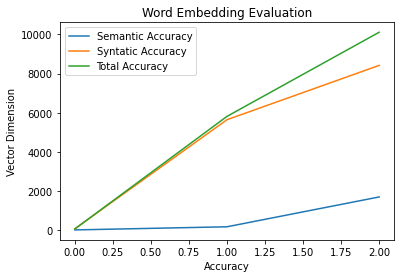

In [ ]:
plt.plot(semantic_acc,label='Semantic Accuracy')
plt.plot(syntatic_acc,label='Syntatic Accuracy')
plt.plot(total_acc,label='Total Accuracy')
plt.title("Word Embedding Evaluation")
plt.xlabel('Accuracy')
plt.ylabel('Vector Dimension')
plt.legend()
plt.show()


In [ ]:
len(vectors[ivocab[80]])

100

In [ ]:
len(vectors)

21613

## 3.2. Performance Evaluation


You are required to provide the table with precision, recall, f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)

In [ ]:
# Please comment your code
#Metrics for test data
outputs = model(test_torch) 
predicted = torch.argmax(outputs, -1)

#printing confusion matrix
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

              precision    recall  f1-score   support

           0       0.50      0.91      0.65      1000
           1       0.51      0.09      0.16      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.40      2000
weighted avg       0.51      0.50      0.40      2000



## 3.3. Hyperparameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence*)
The optimal number of epochs choosen was 100, as this gave the highest validation score while training the data as well as good training accuray.This implies that model generalised well, though still room to imrove. The plot below shows the f1score for each epoch and we can clearly see that the f1score is high around 95 epoch. This analysis is based on learning rate 0.1. If we choose different learning rate, the result would be different as well.

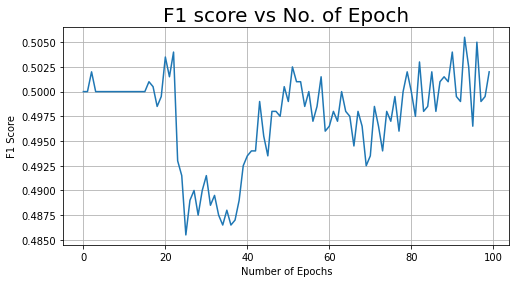

In [ ]:
# Please comment your code
plt.figure(figsize=(8,4))
plt.plot(f1score)
plt.title("F1 score vs No. of Epoch", fontsize=20)
plt.xlabel('Number of Epochs')
plt.ylabel('F1 Score')
plt.grid()

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 